In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [3]:
import sklearn
from sklearn import datasets
from sklearn.preprocessing import scale

In [4]:
'''Loading built in dataset from SKLEARN call IRIS dataset'''
iris = datasets.load_iris()

'''X1 not scaled'''
X1 = iris.data

'''X2 scaled dataset'''
X2 = scale(iris.data)

y = pd.DataFrame(iris.target)
variable_names = iris.feature_names

In [5]:
'''
    We will be loading the iris dataframe
'''
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

In [6]:
'''Let us check the values for X1'''
X1[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
'''Let us check the values for X2'''
X2[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [8]:
y_grouped = y.groupby('Targets').agg('value_counts')
y_grouped_df = y_grouped.reset_index()
y_grouped_df

,Targets,count
0,0,50
1,1,50
2,2,50


In [9]:
'''importing KMeans for clustering'''
from sklearn.cluster import KMeans

In [10]:
'''Let us create a MODEL using clustering - KMeans
    We will be using X2 first.
    K == n_cluster depends on the actual Y response. (based on the top values, we got three(3) K clusters)
'''

clustering = KMeans(n_clusters=3, random_state=5, n_init='auto')
clustering.fit(X2)

KMeans(n_clusters=3, n_init='auto', random_state=5)

In [11]:
'''labels_ is the predicted clustering response'''
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

In [12]:
cl_df = pd.DataFrame(clustering.labels_, columns=['Targets'])
cl_grouped = cl_df.groupby('Targets').agg('value_counts')
cl_grouped_df = cl_grouped.reset_index()
cl_grouped_df

,Targets,count
0,0,49
1,1,55
2,2,46


Text(0.5, 1.0, 'K-Means Classification')

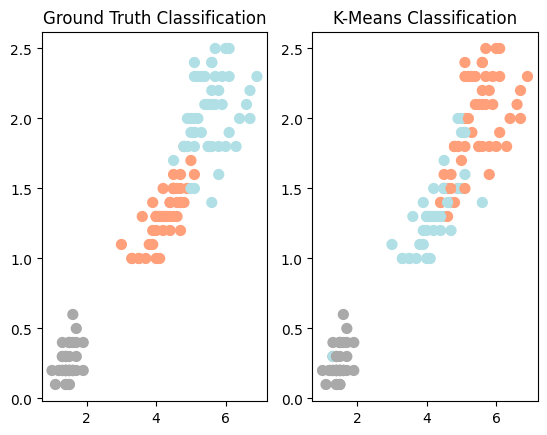

In [13]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

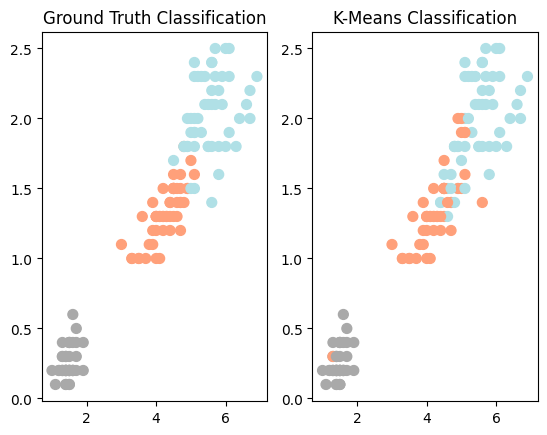

In [14]:
'''Seems label is different from the Actual or Truth graph
    we need to do label adjustments, this happens often.
'''
relabel = np.choose(clustering.labels_, [0, 2, 1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

In [15]:
'''Let us check the precision and recall
    limit is 0.99
    higher the precision and recall is good.
    recall => completeness checking
'''
from sklearn.metrics import classification_report

'''Compare the actual vs response'''
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.80      0.74      0.77        50
           2       0.76      0.84      0.80        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



Text(0.5, 1.0, 'K-Means Classification')

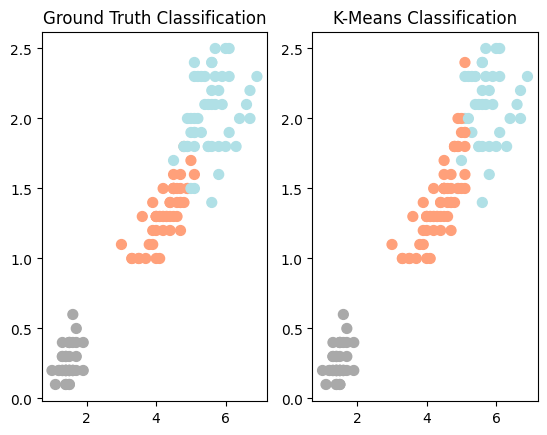

In [16]:
'''
    WE WILL BE USING THE UNSCALED DATA
'''
clustering = KMeans(n_clusters=3, random_state=5, n_init='auto')
clustering.fit(X1)

color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

relabel = np.choose(clustering.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')